## Setup + Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

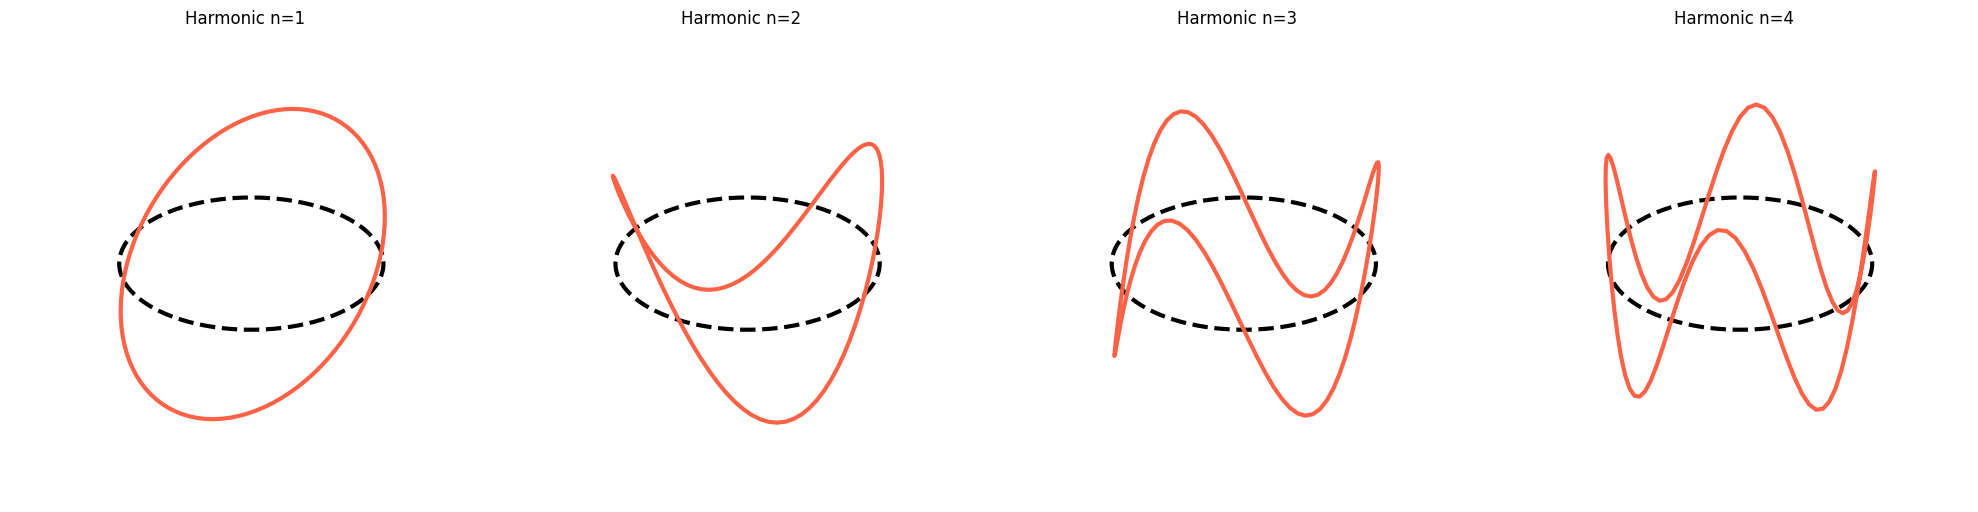

In [27]:
theta = np.linspace(0, 2 * np.pi, 100)
r = 1  
x = r * np.cos(theta)
y = r * np.sin(theta)

harmonics = [1,2,3,4]
#harmonics = [1.5**i for i in range(1, 5)]
num_harmonics = len(harmonics)

# Create subplots with one row and n_harmonics columns
fig, axs = plt.subplots(1, num_harmonics, subplot_kw={'projection': '3d'}, figsize=(20, 5))

for i, n in enumerate(harmonics):
    
    z = np.sin(n * theta)

    ax = axs[i]

    #ax.plot(x, y, zs=0, zdir='z', label=f'Circle, n={i}', linestyle='dotted')
    ax.plot(x, y, zs=0, zdir='z', label=f'Circle, n={i}', linewidth=3, color='black', linestyle='--')

    ax.plot(x, y, z, label=f'Harmonic n={i}',linewidth=3,color='tomato')

    ax.axis('off')

    ax.set_title(f'Harmonic n={n}')

plt.tight_layout()

plt.show()

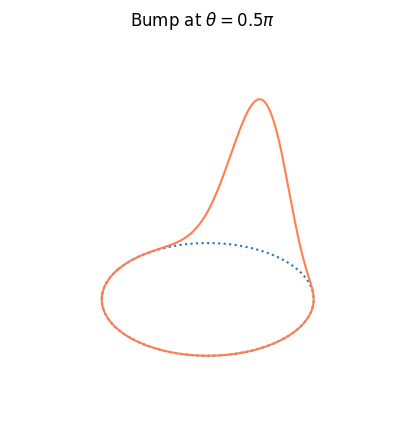

In [10]:
theta = np.linspace(-np.pi, np.pi, 400) 
r = 1 


def gaussian_on_circle(theta, loc, sigma=0.3):
    """A Gaussian-like function defined on the circle."""
    return np.exp(-(theta-loc)**2 / (2 * sigma**2))


x = r * np.cos(theta)
y = r * np.sin(theta)
loc = 0.5*np.pi
z = gaussian_on_circle(theta, loc=loc)

fig, axs = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(5, 5))

ax = axs

ax.plot(x, y, zs=0, zdir='z', label=f'Circle', linestyle='dotted')

ax.plot(x, y, z, label=f'Bump function on the circle', color='coral', linewidth=3)

ax.axis('off')

ax.set_title(f'Bump at $\\theta={loc/np.pi} \\pi$')
plt.show()

In [14]:
M = 4 
num_samples = 1000 
loc = 0.5*np.pi
theta = np.linspace(0, 2 * np.pi, num_samples, endpoint=False)  # theta values

# Gaussian-like function centered at pi (for simplicity)
def f(theta, sigma=np.pi/8):
    return np.exp(-((theta - np.pi)**2) / (2 * sigma**2))



# Compute the Fourier coefficients using FFT
coefficients_fft = np.fft.fft(bump_samples)

# Since FFT returns coefficients in a different order, adjust if needed
coefficients_fft_shifted = np.fft.fftshift(coefficients_fft)

# Extract the relevant coefficients (for both positive and negative frequencies)
# Note: For visualization, we might limit the range around the 0 frequency for clarity
relevant_coeffs = coefficients_fft_shifted[num_samples//2-M:num_samples//2+M+1]

# Visualization of the magnitude of the Fourier coefficients
plt.stem(range(-M, M+1), np.abs(relevant_coeffs))
plt.xlabel('Harmonic number n')
plt.ylabel('Magnitude of Coefficient')
plt.title('Magnitude of Fourier Coefficients')
plt.show()

NameError: name 'bump_samples' is not defined

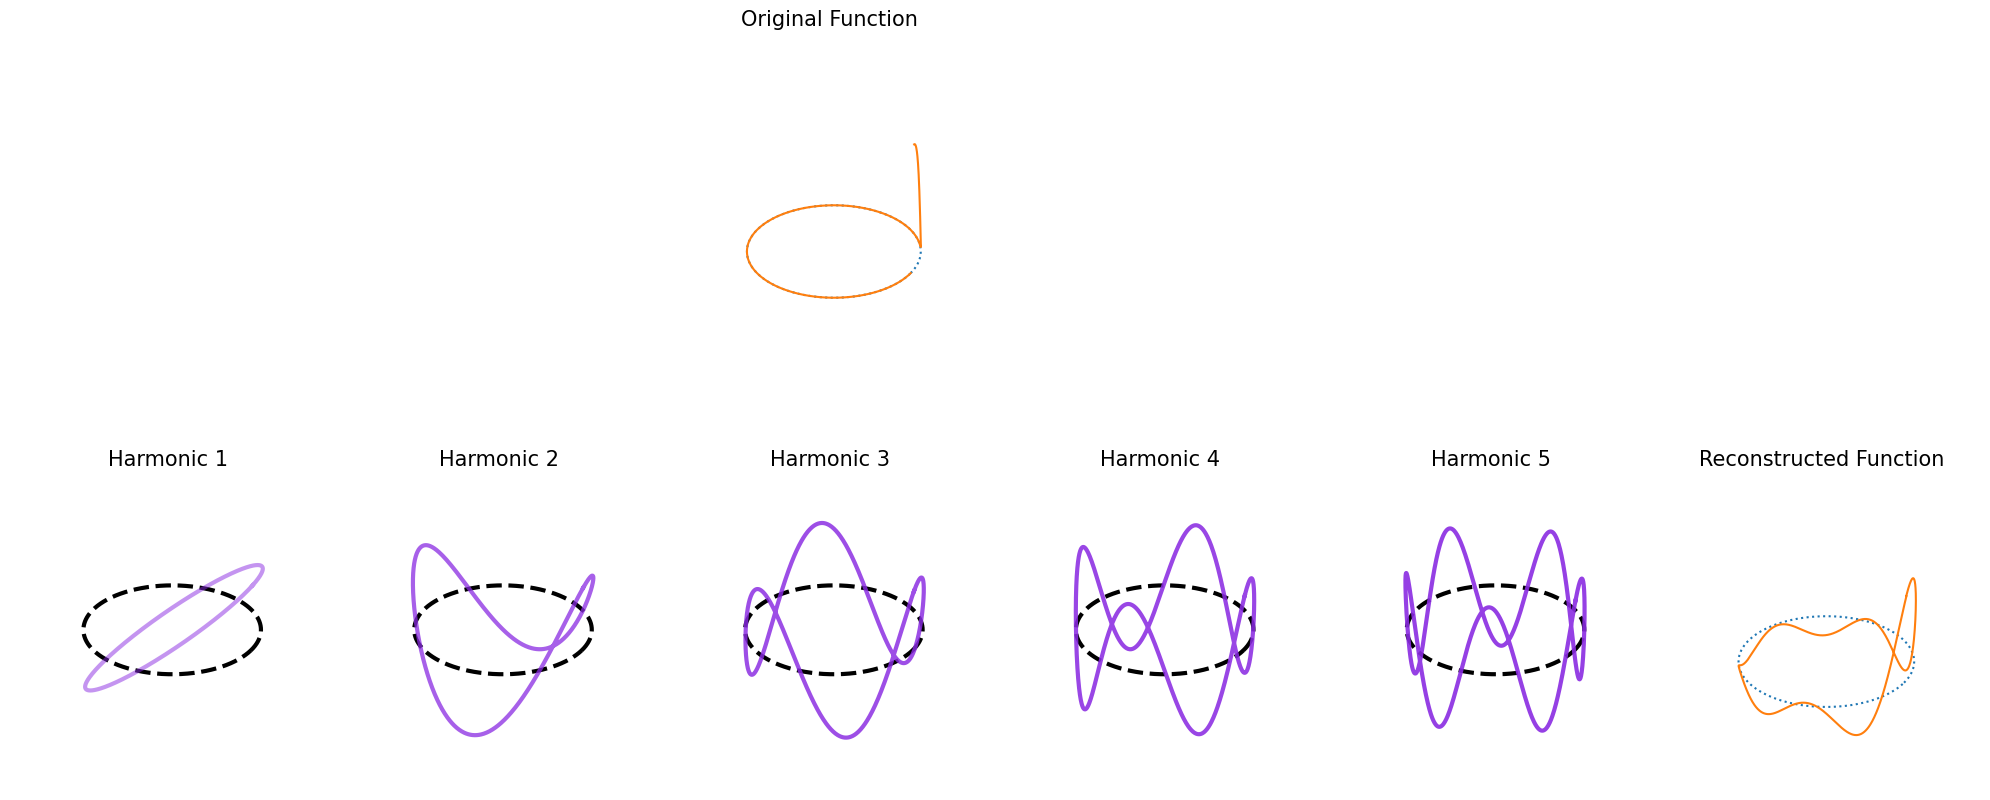

In [36]:
L = 10 # Length of the domain
num_samples = 1000
xs = np.linspace(0, L, num_samples)

N = 5 # Number of harmonics

loc = 0
sigma = 0.3

def bump_function(x, loc, sigma):
    return np.exp(-((x - loc)**2) / (2 * sigma**2))

bump_samples = bump_function(xs, loc, sigma)

def plot_harmonic(ax, amplitude, phase, n, xs, label):
    harmonic_values = amplitude * np.cos(n * 2*np.pi*xs/L + phase)
    ax.plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), zs=0, zdir='z', linestyle='--',linewidth=3, color='black')
    ax.plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), harmonic_values, label=label,linewidth=3,color='blueviolet',alpha=1-0.5/n)
    ax.axis('off')

# Compute FFT
coefficients_fft = np.fft.fft(bump_samples)
frequencies = np.fft.fftfreq(num_samples, d=(2*np.pi/num_samples))

# Prepare figure for plotting
fig, axs = plt.subplots(2, N+1, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Plot original function
axs[0, 2].plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), zs=0, zdir='z', linestyle='dotted')
axs[0, 2].plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), bump_samples, label='Original Function')
axs[0, 2].set_title('Original Function',fontsize=15)

for ax in axs[0, :]:
    ax.axis('off')

# Plot each harmonic and the reconstructed function
reconstructed = np.zeros(num_samples)
for n in range(1, N+1):
    index = n if frequencies[n] >= 0 else num_samples + n
    amplitude = np.abs(coefficients_fft[index])
    phase = np.angle(coefficients_fft[index])
    
    plot_harmonic(axs[1, n-1], amplitude, phase, n, xs, f'Harmonic {n}')
    axs[1, n-1].set_title(f'Harmonic {n}',fontsize=15)
    
    reconstructed += amplitude * np.cos(n * theta + phase)

# Reconstructed function might need scaling or adjustment based on FFT properties
axs[1, N].plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), zs=0, zdir='z', linestyle='dotted')
axs[1, N].plot(np.cos(2*np.pi*xs/L), np.sin(2*np.pi*xs/L), reconstructed, label='Reconstructed')
axs[1, N].set_title('Reconstructed Function',fontsize=15)
axs[1, N].axis('off')

plt.tight_layout()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


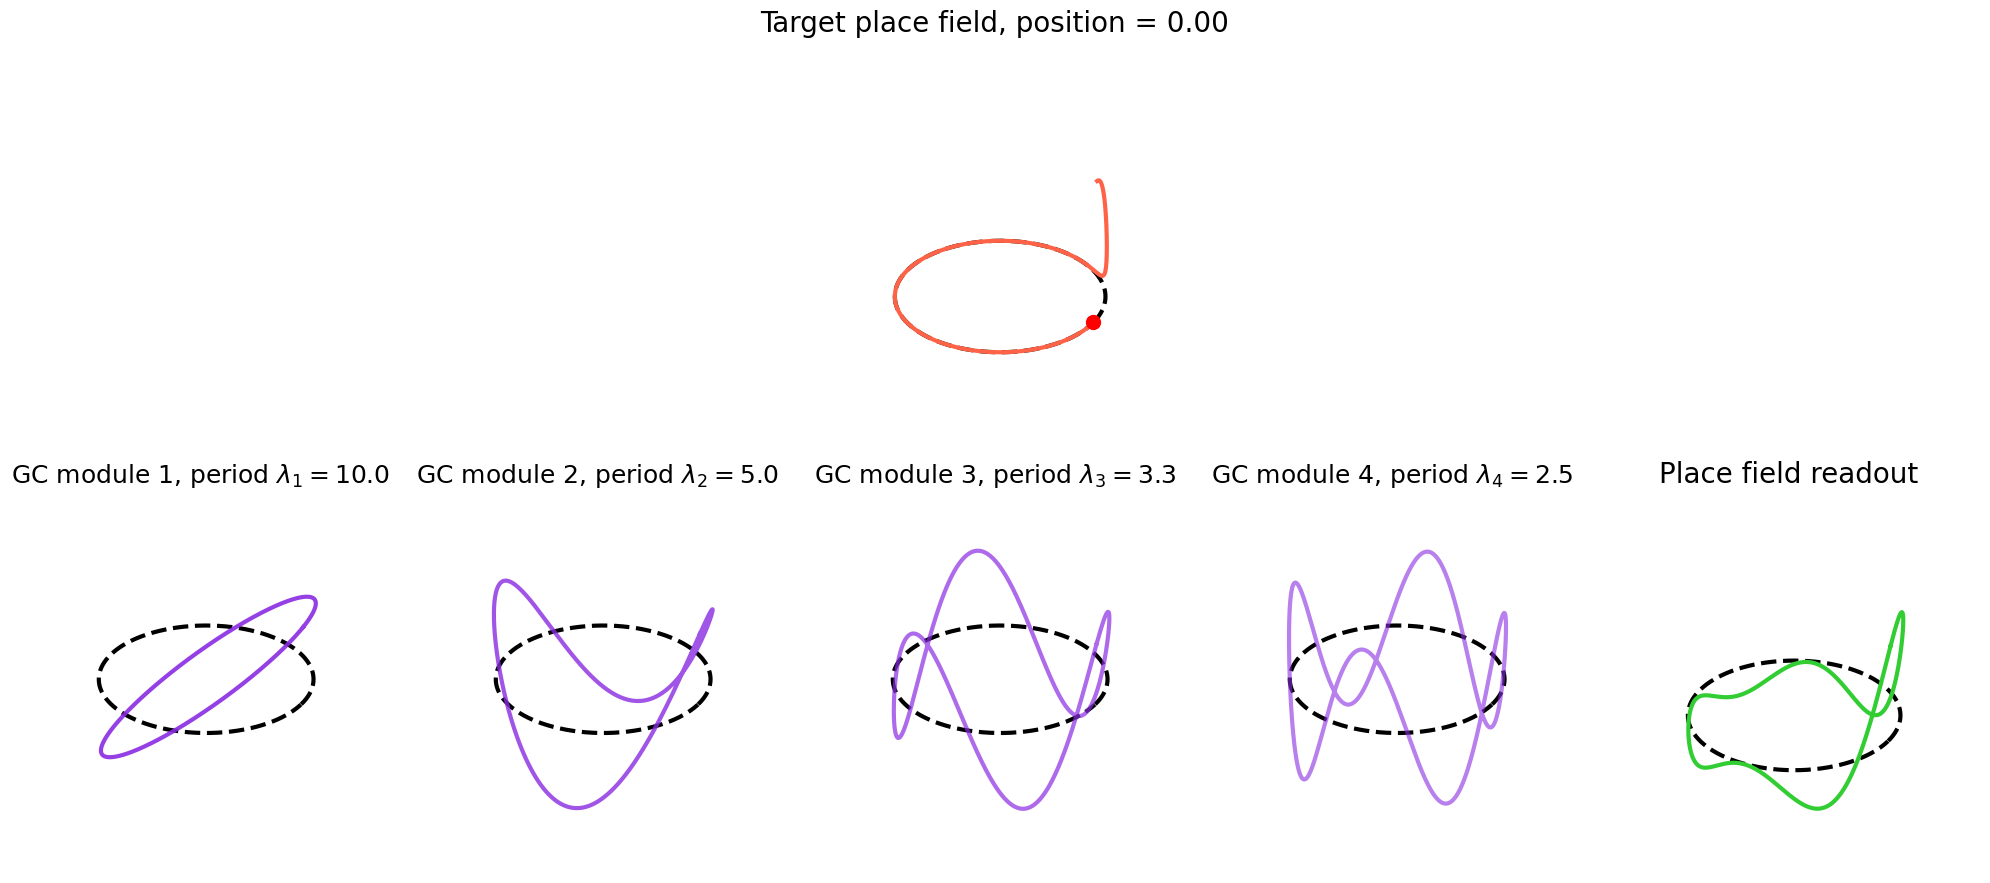

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initialize parameters
num_samples = 1000
theta = np.linspace(0, 2 * np.pi, num_samples, endpoint=False)
N = 4  # Number of harmonics

# Function to plot a harmonic given amplitude and phase
def plot_harmonic(ax, amplitude, phase, n, label):
    harmonic_values = amplitude * np.cos(n * theta + phase)
    ax.plot(np.cos(theta), np.sin(theta), zs=0, zdir='z', linestyle='--',linewidth=3, color='black')
    ax.plot(np.cos(theta), np.sin(theta), harmonic_values, label=label,linewidth=3,color='blueviolet',alpha=1-0.1*n)
    ax.axis('off')

# Prepare figure for plotting
fig, axs = plt.subplots(2, N+1, figsize=(20, 10), subplot_kw={'projection': '3d'})
plt.tight_layout()

def update(loc):
    bump_samples = gaussian_on_circle(theta, loc=loc)

    # Compute FFT
    coefficients_fft = np.fft.fft(bump_samples)
    frequencies = np.fft.fftfreq(num_samples, d=(2*np.pi/num_samples))

    # Clear previous plots
    for ax_row in axs:
        for ax in ax_row:
            ax.cla()
            ax.axis('off')

    # Plot original function
    axs[0, 2].plot(np.cos(theta), np.sin(theta), zs=0, zdir='z', linestyle='--',linewidth=3,color='black')
    axs[0, 2].plot(np.cos(theta), np.sin(theta), bump_samples, label='Original Function',linewidth=3,color='tomato')
    axs[0, 2].set_title('Target place field, position = {:.2f}'.format(loc),fontsize=20)
    axs[0, 2].scatter(np.cos(loc), np.sin(loc), zs=0, zdir='z', s=100, c='red')

    # Plot each harmonic and the reconstructed function
    reconstructed = np.zeros(num_samples)
    for n in range(1, N+1):
        index = n if frequencies[n] >= 0 else num_samples + n
        amplitude = np.abs(coefficients_fft[index])
        phase = np.angle(coefficients_fft[index])
        
        plot_harmonic(axs[1, n-1], amplitude, phase, n, f'GC module {n}, period $\lambda=${L/n:0.1f}')
        axs[1, n-1].set_title(f'GC module {n}, period $\lambda_{n}=${L/n:0.1f}',fontsize=18)
        
        reconstructed += amplitude * np.cos(n * theta + phase)

    # Reconstructed function
    axs[1, N].plot(np.cos(theta), np.sin(theta), zs=0, zdir='z', linestyle='--',linewidth=3,color='black')
    axs[1, N].plot(np.cos(theta), np.sin(theta), reconstructed, label='Reconstructed',linewidth=3,color='limegreen')
    axs[1, N].set_title('Place field readout',fontsize=20)

# Create animation
loc_values = np.linspace(0, 2*np.pi, 100)  
ani = FuncAnimation(fig, update, frames=loc_values, repeat=True)

# Save the animation
ani.save('gaussian_bump_harmonics.gif', writer='imagemagick', fps=10)